<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_PREDICT_OTHERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks

In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [4]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap


/users/annashch/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/users/annashch/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 216)


In [6]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(428, 219)


In [7]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 186)


In [8]:
train_split,eval_split=split_train_eval_by_mut_pos(neil1_comp[~neil1_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{20.0: 3, 21.0: 3, 22.0: 3, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 20, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 19, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 20, 57.0: 15, 58.0: 31}


## Train NEIL1, predict TTYH2

In [9]:
test_split=ttyh2_comp

In [10]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [11]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [12]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [13]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

mut_type:wt
u1_length_internal_es
mut_ref_struct:S
d3_length_internal_es
d1_3prm_cp_bulge
u3_5prm_cp_internal
d3_5prm_cp_hairpin
u3_length_internal_ecs
d3_struct:S
u1_3prm_cp_internal
u2_5prm_cp_bulge:A:U
site_5prm_cp_internal:U:G
mut_struct:H
site_prev_struct:S
d1_3prm_cp_internal:C:G
d2_length_stem
d1_5prm_cp_internal:U:A
u1_length_hairpin
mut_ref_struct:I
u1_length_internal_ecs
mut_struct:B
d3_length_bulge
site_prev_struct:H
mut_type:indel
site_next_struct:I
d3_5prm_cp_bulge:G:C
mut_same_as_site
mut_ref_struct:B
mut_prev_struct:M
u1_3prm_cp_bulge:C:G
u2_exist
d3_struct:I
site_length_hairpin
mut_exist
d2_3prm_cp_internal:G:U
d2_5prm_cp_hairpin
d2_struct:S
site_struct:M
u3_exist
u2_length_internal_ecs
d1_length_hairpin
site_prev_struct:B
d3_length_internal_ecs
d1_exist
d3_length_hairpin
site_next_nt:C
u1_struct:H
u2_3prm_cp_bulge:U:A
u1_exist
d1_length_internal_ecs
d1_5prm_cp_internal:U:G
d1_5prm_cp_hairpin
u2_length_internal_es
d3_3prm_cp_bulge:C:G
u1_5prm_cp_hairpin:C:G
d2_5prm_cp_b

In [14]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [15]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [16]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(320, 119)
(320,)
(71, 119)
(71,)
(601, 215)
(601,)


In [17]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [18]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['u3_length', 'u_count', 'mut_nt:U', 'u3_distance', 'mut_next_struct:I', 'sim_nor_score', 'u3_struct:S', 'd3_length_stem', 'site_3prm_cp_bulge:G:C', 'mut_nt:C', 'mut_struct:I', 'u1_distance', 'u3_length_bulge', 'd2_5prm_cp_internal:A:U', 'd2_3prm_cp_bulge:C:G', 'd2_5prm_cp_internal:C:G', 'probability_active_conf', 'd2_struct:I', 'site_3prm_cp_internal:C:G', 'site_3prm_cp_internal:G:C', 'd_count', 'd3_length', 'site_5prm_cp_bulge:C:G', 'u1_struct:S', 'd2_distance', 'd3_distance', 'u2_5prm_cp_bulge:G:C', 'd2_5prm_cp_internal:G:C', 'u_all_stem_length', 'u2_length_bulge', 'u2_length_stem', 'mut_pos', 'd1_distance', 'site_length', 'mut_nt:G', 'mut_ref_nt:C', 'site_next_nt:A', 'site_length_internal_es', 'site_3prm_cp_internal:G:U', 'd2_length_bulge', 'd2_3prm_cp_internal:G:C', 'site_prev_nt:U', 'num_mutations', 'mut_prev_struct:I', 'site_length_internal_ecs', 'site_1_1:A:G', 'u3_length_hairpin', 'site_length_bulge', 'u2_length', 'd2_length_internal_ecs', 'd2_3prm_cp_internal:U:A', 'u3_struct

In [19]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [20]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [21]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [22]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.514331	eval-auc:0.755043	eval-mae:0.208153	eval-map:1	eval-rmse:0.235998	train-aucpr:0.568509	train-auc:0.818235	train-mae:0.208018	train-map:1	train-rmse:0.244401
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.520403	eval-auc:0.761466	eval-mae:0.159838	eval-map:1	eval-rmse:0.181943	train-aucpr:0.579068	train-auc:0.823184	train-mae:0.152239	train-map:1	train-rmse:0.178769
[2]	eval-aucpr:0.521059	eval-auc:0.764863	eval-mae:0.128958	eval-map:1	eval-rmse:0.149682	train-aucpr:0.581101	train-auc:0.825596	train-mae:0.114653	train-map:1	train-rmse:0.134266
[3]	eval-aucpr:0.528747	eval-auc:0.779002	eval-mae:0.106217	eval-map:1	eval-rmse:0.127679	train-aucpr:0.587843	train-auc:0.832626	train-mae:0.086684	train-map:1	train-rmse:0.102453
[4]	eval-aucpr:0.52952	eval-auc:0.779091	eval-mae:0.090962	eval-map:1	eval-rmse:0.114891	train-aucpr:0.589136	train-auc:0.835101	tr

[45]	eval-aucpr:0.532849	eval-auc:0.7905	eval-mae:0.060872	eval-map:1	eval-rmse:0.093184	train-aucpr:0.598338	train-auc:0.843385	train-mae:0.005696	train-map:1	train-rmse:0.009166
[46]	eval-aucpr:0.532849	eval-auc:0.7905	eval-mae:0.060824	eval-map:1	eval-rmse:0.093167	train-aucpr:0.598341	train-auc:0.843389	train-mae:0.005604	train-map:1	train-rmse:0.009087
[47]	eval-aucpr:0.533765	eval-auc:0.791036	eval-mae:0.0608	eval-map:1	eval-rmse:0.093067	train-aucpr:0.59832	train-auc:0.843402	train-mae:0.005375	train-map:1	train-rmse:0.008743
[48]	eval-aucpr:0.534777	eval-auc:0.790874	eval-mae:0.060752	eval-map:1	eval-rmse:0.092962	train-aucpr:0.598406	train-auc:0.843426	train-mae:0.005066	train-map:1	train-rmse:0.008363
[49]	eval-aucpr:0.534777	eval-auc:0.790874	eval-mae:0.060703	eval-map:1	eval-rmse:0.092947	train-aucpr:0.59841	train-auc:0.84343	train-mae:0.004944	train-map:1	train-rmse:0.008267
[50]	eval-aucpr:0.53473	eval-auc:0.790723	eval-mae:0.060678	eval-map:1	eval-rmse:0.092961	train-auc

[91]	eval-aucpr:0.533366	eval-auc:0.791436	eval-mae:0.060135	eval-map:1	eval-rmse:0.092365	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001634	train-map:1	train-rmse:0.004767
[92]	eval-aucpr:0.533366	eval-auc:0.791436	eval-mae:0.060135	eval-map:1	eval-rmse:0.092365	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001634	train-map:1	train-rmse:0.004767
[93]	eval-aucpr:0.533366	eval-auc:0.791436	eval-mae:0.060135	eval-map:1	eval-rmse:0.092365	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001634	train-map:1	train-rmse:0.004767
Stopping. Best iteration:
[83]	eval-aucpr:0.533366	eval-auc:0.791436	eval-mae:0.060136	eval-map:1	eval-rmse:0.092365	train-aucpr:0.598658	train-auc:0.843557	train-mae:0.001634	train-map:1	train-rmse:0.004767



In [23]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [24]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9991100820068809, pvalue=0.0)
	Pearson corr : (0.9997996563591425, 0.0)
	MAE : 0.0016343097535225742
	MAPE : 0.01644662337284466
	RMSE : 0.0047666505504947495
	auPRC : 1.0
	auROC : 0.9993529411764706
Eval
	Spearman corr : SpearmanrResult(correlation=0.9140598824578634, pvalue=9.462297431514339e-29)
	Pearson corr : (0.9116886798204891, 2.3244428293496166e-28)
	MAE : 0.06013547883728441
	MAPE : 0.38496909847029703
	RMSE : 0.09236494938021883
	auPRC : 0.9518757620569909
	auROC : 0.9456349206349206
Test
	Spearman corr : SpearmanrResult(correlation=0.510866372410449, pvalue=2.913811704173142e-41)
	Pearson corr : (0.4537714892787265, 7.322897228501062e-32)
	MAE : 0.19235946548401617
	MAPE : 3.798372409646924
	RMSE : 0.2399927372243362
	auPRC : 0.6531145950871979
	auROC : 0.7651668646219055


In [27]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9991100820068809, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9140598824578634, pvalue=9.462297431514339e-29)
Test:SpearmanrResult(correlation=0.510866372410449, pvalue=2.913811704173142e-41)


Pearson correlation:
Train:(0.9997996563591425, 0.0)
Eval:(0.9116886798204891, 2.3244428293496166e-28)
Test:(0.4537714892787265, 7.322897228501062e-32)


In [28]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0016343097535225742
MAE Eval:0.06013547883728441
MAE Test:0.19235946548401617


In [29]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.6446623372844658%
MAPE Eval:38.496909847029706%
MAPE Test:379.8372409646924%


In [30]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0047666505504947495
RMSE Eval:0.09236494938021883
RMSE Test:0.2399927372243362


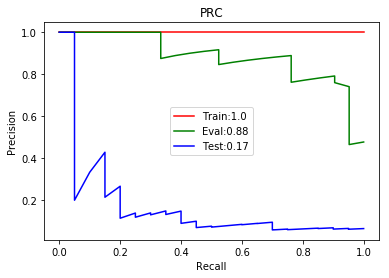

In [31]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

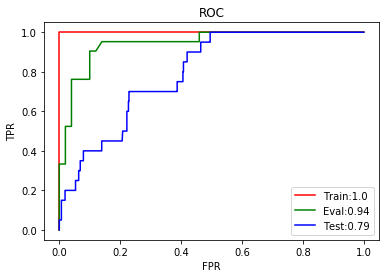

In [32]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

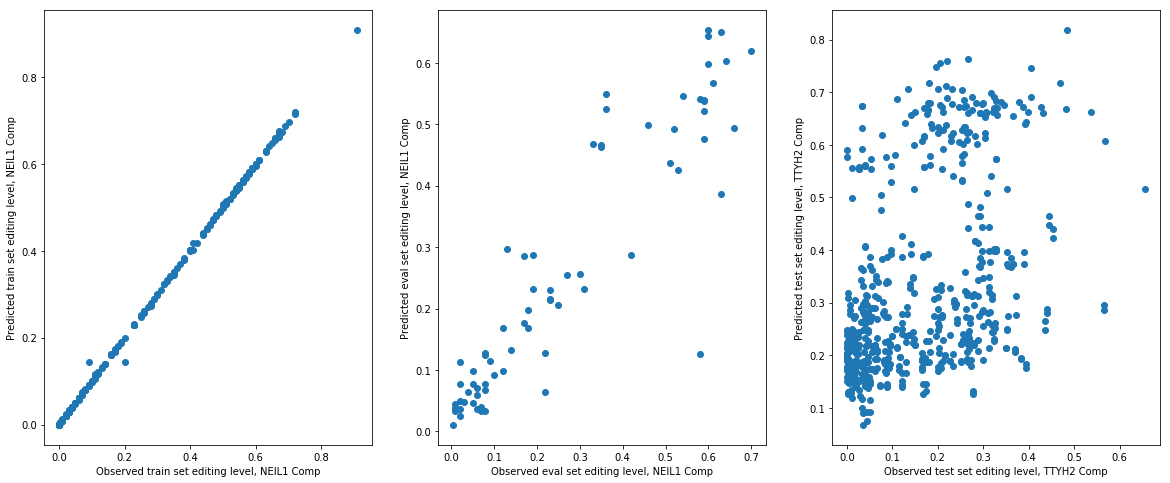

In [33]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, NEIL1 Comp")
plt.ylabel("Predicted train set editing level, NEIL1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, NEIL1 Comp")
plt.ylabel("Predicted eval set editing level, NEIL1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, TTYH2 Comp")
plt.ylabel("Predicted test set editing level, TTYH2 Comp")
plt.show()

In [34]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.32794484
27.98750347482422
34.615504866178014
The R-square of the test data is  -0.237 



## Train NEIL1, predict AJUBA

In [35]:
test_split=ajuba_comp

In [36]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [37]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [38]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [39]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u2_exist
u1_length_internal_es
d2_length_bulge
u3_length_internal_es
site_length_hairpin
d3_5prm_cp_bulge
d3_3prm_cp_bulge
u1_5prm_cp_hairpin
u1_5prm_cp_internal
d3_5prm_cp_hairpin
u3_5prm_cp_internal
u3_length_internal_ecs
d2_exist
d2_5prm_cp_hairpin
u1_3prm_cp_internal
u2_length_internal_ecs
d1_length_hairpin
d1_exist
d3_length_hairpin
u2_3prm_cp_internal
u2_5prm_cp_internal
u1_exist
u1_length_hairpin
d3_exist
d2_5prm_cp_bulge
u1_length_internal_ecs
u3_3prm_cp_internal
d1_5prm_cp_hairpin
d2_length_hairpin
d3_length_bulge
u2_length_internal_es
site_5prm_cp_hairpin
d2_3prm_cp_bulge


In [40]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [41]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [42]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(320, 118)
(320,)
(71, 118)
(71,)
(482, 152)
(482,)


In [43]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [44]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['u3_length', 'u_count', 'mut_nt:U', 'u3_distance', 'mut_next_struct:I', 'sim_nor_score', 'u3_struct:S', 'd3_length_stem', 'site_3prm_cp_bulge:G:C', 'mut_nt:C', 'mut_struct:I', 'u1_distance', 'u3_length_bulge', 'd2_5prm_cp_internal:A:U', 'probability_active_conf', 'site_3prm_cp_bulge:A:U', 'd2_struct:I', 'site_3prm_cp_internal:C:G', 'site_3prm_cp_internal:G:C', 'd_count', 'd3_length', 'site_5prm_cp_bulge:C:G', 'u1_struct:S', 'd2_distance', 'u1_5prm_cp_bulge:C:G', 'd3_distance', 'd2_5prm_cp_internal:G:C', 'u_all_stem_length', 'u2_length_bulge', 'u2_length_stem', 'mut_pos', 'd1_distance', 'site_length', 'mut_nt:G', 'mut_ref_nt:C', 'site_5prm_cp_bulge:A:U', 'site_next_nt:A', 'site_length_internal_es', 'd2_3prm_cp_internal:G:C', 'site_prev_nt:U', 'num_mutations', 'mut_prev_struct:I', 'site_length_internal_ecs', 'site_1_1:A:G', 'u3_length_hairpin', 'site_length_bulge', 'u2_length', 'd2_length_internal_ecs', 'd2_3prm_cp_internal:U:A', 'u3_struct:H', 'mut_next_struct:S', 'site_3prm_cp_interna

In [45]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [46]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [47]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [48]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.514331	eval-auc:0.755043	eval-mae:0.208153	eval-map:1	eval-rmse:0.235998	train-aucpr:0.568509	train-auc:0.818235	train-mae:0.208018	train-map:1	train-rmse:0.244401
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.520403	eval-auc:0.761466	eval-mae:0.159838	eval-map:1	eval-rmse:0.181943	train-aucpr:0.579068	train-auc:0.823184	train-mae:0.152239	train-map:1	train-rmse:0.178769
[2]	eval-aucpr:0.521059	eval-auc:0.764863	eval-mae:0.128958	eval-map:1	eval-rmse:0.149682	train-aucpr:0.581101	train-auc:0.825596	train-mae:0.114653	train-map:1	train-rmse:0.134266
[3]	eval-aucpr:0.528747	eval-auc:0.779002	eval-mae:0.106217	eval-map:1	eval-rmse:0.127679	train-aucpr:0.587843	train-auc:0.832626	train-mae:0.086684	train-map:1	train-rmse:0.102453
[4]	eval-aucpr:0.52952	eval-auc:0.779091	eval-mae:0.090962	eval-map:1	eval-rmse:0.114891	train-aucpr:0.589136	train-auc:0.835101	tr

[45]	eval-aucpr:0.531211	eval-auc:0.792902	eval-mae:0.059015	eval-map:1	eval-rmse:0.092936	train-aucpr:0.598237	train-auc:0.84334	train-mae:0.006381	train-map:1	train-rmse:0.010123
[46]	eval-aucpr:0.531191	eval-auc:0.792851	eval-mae:0.058715	eval-map:1	eval-rmse:0.092736	train-aucpr:0.598244	train-auc:0.843346	train-mae:0.006235	train-map:1	train-rmse:0.009979
[47]	eval-aucpr:0.532531	eval-auc:0.793427	eval-mae:0.058448	eval-map:1	eval-rmse:0.092714	train-aucpr:0.598273	train-auc:0.843373	train-mae:0.005915	train-map:1	train-rmse:0.009538
[48]	eval-aucpr:0.532502	eval-auc:0.793205	eval-mae:0.058521	eval-map:1	eval-rmse:0.092818	train-aucpr:0.598309	train-auc:0.843381	train-mae:0.005696	train-map:1	train-rmse:0.009259
[49]	eval-aucpr:0.532502	eval-auc:0.793205	eval-mae:0.058487	eval-map:1	eval-rmse:0.092802	train-aucpr:0.598317	train-auc:0.843395	train-mae:0.005524	train-map:1	train-rmse:0.009042
[50]	eval-aucpr:0.532536	eval-auc:0.793296	eval-mae:0.058484	eval-map:1	eval-rmse:0.092785	

[91]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	train-aucpr:0.59866	train-auc:0.843558	train-mae:0.001605	train-map:1	train-rmse:0.004742
[92]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	train-aucpr:0.59866	train-auc:0.843558	train-mae:0.001605	train-map:1	train-rmse:0.004742
[93]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	train-aucpr:0.59866	train-auc:0.843558	train-mae:0.001605	train-map:1	train-rmse:0.004742
[94]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	train-aucpr:0.59866	train-auc:0.843558	train-mae:0.001605	train-map:1	train-rmse:0.004742
[95]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	train-aucpr:0.59866	train-auc:0.843558	train-mae:0.001605	train-map:1	train-rmse:0.004742
[96]	eval-aucpr:0.530491	eval-auc:0.792811	eval-mae:0.057745	eval-map:1	eval-rmse:0.092276	trai

In [49]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [50]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9991143884450924, pvalue=0.0)
	Pearson corr : (0.9998017143685966, 0.0)
	MAE : 0.001605133541618032
	MAPE : 0.01756523931594684
	RMSE : 0.004742424959998238
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9246136645893119, pvalue=1.2313977903377598e-30)
	Pearson corr : (0.911823337649362, 2.2102854011461923e-28)
	MAE : 0.05774515752515324
	MAPE : 0.34898833046359024
	RMSE : 0.09227593136812584
	auPRC : 0.9920622902649725
	auROC : 0.9640522875816994
Test
	Spearman corr : SpearmanrResult(correlation=0.5569154034620737, pvalue=1.2993397761939391e-40)
	Pearson corr : (0.7538893318908644, 1.302969374115583e-89)
	MAE : 0.22251747139295644
	MAPE : 7.197632862549439
	RMSE : 0.2576372070792658
	auPRC : 0.8162205444839601
	auROC : 0.9637638230647709


In [51]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9991143884450924, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9246136645893119, pvalue=1.2313977903377598e-30)
Test:SpearmanrResult(correlation=0.5569154034620737, pvalue=1.2993397761939391e-40)


Pearson correlation:
Train:(0.9998017143685966, 0.0)
Eval:(0.911823337649362, 2.2102854011461923e-28)
Test:(0.7538893318908644, 1.302969374115583e-89)


In [52]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.001605133541618032
MAE Eval:0.05774515752515324
MAE Test:0.22251747139295644


In [53]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.7565239315946841%
MAPE Eval:34.89883304635902%
MAPE Test:719.7632862549439%


In [54]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.004742424959998238
RMSE Eval:0.09227593136812584
RMSE Test:0.2576372070792658


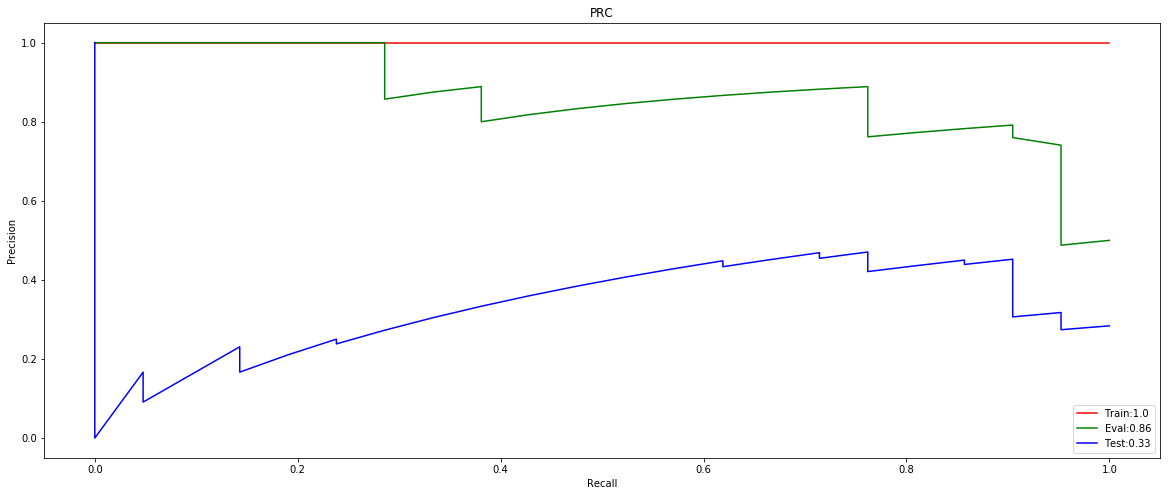

In [55]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

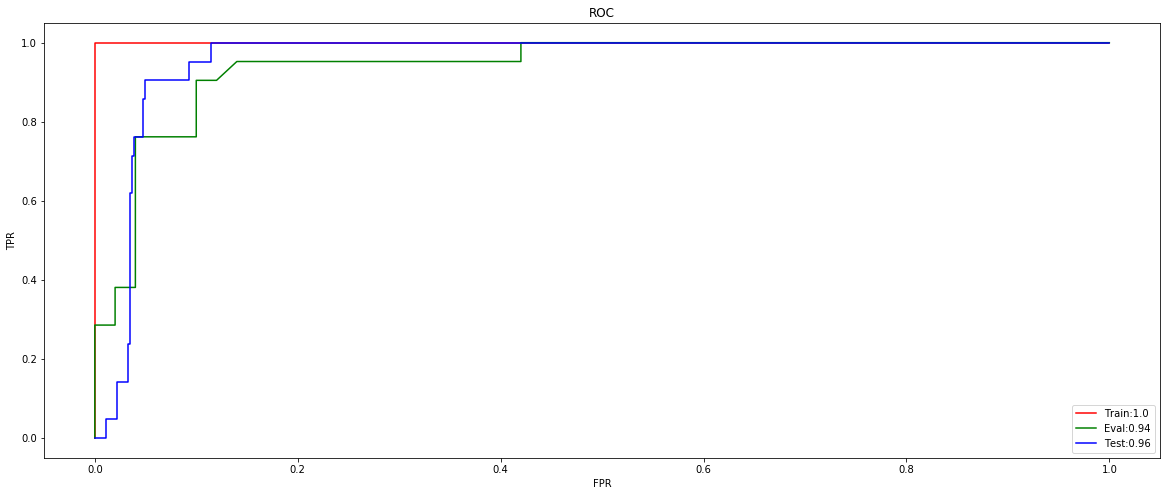

In [56]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

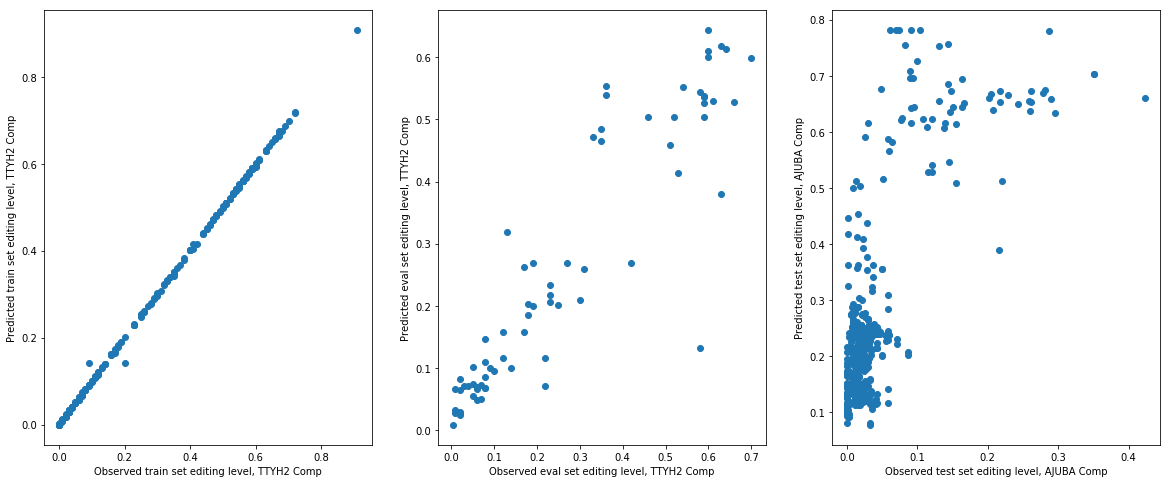

In [57]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()

In [58]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.26092932
25.49747981448293
31.993680487313327
The R-square of the test data is  -0.255 

